# Codebook  
**Authors:** Patrick Guo  
Documenting existing data files of DaanMatch with information about location, owner, "version", source etc.

In [1]:
import pandas as pd
import numpy as np 
import os
from collections import Counter
import matplotlib.pyplot as plt
import statistics

In [2]:
#os.chdir("DaanMatch_DataFiles")

In [3]:
#!ls

# Andaman_Nicobar_Islands_2016.xlsx'  

## TOC:
* [About this dataset](#1)
* [What's in this dataset](#2)
* [Codebook](#3)
* [Columns](#4)
    * [CIN](#4.1)
    * [COMPANY_NAME](#4.2)
    * [COMPANY_CLASS](#4.3)
    * [COMPANY_CATEGORY](#4.4)
    * [COMPANY_SUBCAT](#4.5)
    * [COMPANY_STATUS](#4.6)
    * [DATE_OF_REGISTRATION](#4.7)
    * [REGISTERED_STATE](#4.8)
    * [Authorized Capital  (Rs.)](#4.9)
    * [PAIDUP_CAPITAL (Rs.)](#4.10)
    * [PRINCIPAL_BUSINESS_ACTIVITY_CODE](#4.11)
    * [REGISTERED_OFFICE_ADDRESS](#4.12)
    * [EMAIL_ID](#4.13)
    * [LATEST ANNUAL REPORT FILING FY END DATE](#4.14)
    * [LATEST BALANCE SHEET FILING FY END DATE](#4.15)

**About this dataset**  <a class="anchor" id="1"></a>  
Data provided by: MCA  
Source: https://www.mca.gov.in/Ministry/pdf/Andaman_Nicobar_Islands_2016.xlsx  
Stored: https://www.dropbox.com/sh/43nifucv8kjtxy3/AAAmidU7yxLwjgepdIbgllPIa?dl=0&preview=Andaman_Nicobar_Islands_2016.xlsx  
Uploaded by: Cara Foss  
Date uploaded: 9/23/2020, 4:25 PM  
Size: 3.16MB  

In [3]:
path = ('Andaman_Nicobar_Islands_2016.xlsx')
Andaman_Nicobar_Islands_2016 = pd.ExcelFile(path)
print(Andaman_Nicobar_Islands_2016.sheet_names)
# Combine both sheets
Andaman_Nicobar_Islands_2016_1 = Andaman_Nicobar_Islands_2016.parse('Sheet1')
Andaman_Nicobar_Islands_2016_2 = Andaman_Nicobar_Islands_2016.parse('Sheet2')
Andaman_Nicobar_Islands_2016_merged = Andaman_Nicobar_Islands_2016_1.append(Andaman_Nicobar_Islands_2016_2)
# Reset index
Andaman_Nicobar_Islands_2016_merged = Andaman_Nicobar_Islands_2016_merged.reset_index(drop=True)
Andaman_Nicobar_Islands_2016_merged.head()

['Sheet1', 'Sheet2']


,CIN,COMPANY_NAME,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUBCAT,COMPANY_STATUS,DATE_OF_REGISTRATION,REGISTERED_STATE,Authorized Capital (Rs.),PAIDUP_CAPITAL (RS.),PRINCIPAL_BUSINESS_ACTIVITY_CODE,REGISTERED_OFFICE_ADDRESS,EMAIL_ID,LATEST ANNUAL REPORT FILING FY END DATE,LATEST BALANCE SHEET FILING FY END DATE
0,U74999AP2007PLC053278,ANRAK ALUMINIUM LIMITED,Public,Company limited by Shares,Non-govt company,ACTIVE,2007-03-23 00:00:00,Andhra Pradesh,100000000000,16692588120,74999,"APIIC INDUSTRIAL PARK, RACHAPALLI(VILLAGE)MAKA...",csrajk@gmail.com,2015-03-31,2015-03-31
1,U27109AP1982GOI003404,RASHTRIYA ISPAT NIGAM LTD,Public,Company limited by Shares,Union Govt company,ACTIVE,1982-02-18 00:00:00,Andhra Pradesh,80000000000,48898462000,27109,ADMINISTRATIVE BUILDINGVISAKHAPATNAMANDHRA PRA...,csrinl@vizagsteel.com,2015-03-31,2015-03-31
2,L45204AP2001PLC057199,KSK ENERGY VENTURES LIMITED,Public,Company limited by Shares,Non-govt company,ACTIVE,2001-02-14 00:00:00,Andhra Pradesh,50315000000,4579857740,45204,"8-2-293/82/A/431/A,ROAD NO.22, JUBILEE HILLS, ...",comp.sect@ksk.co.in,2015-03-31,2015-03-31
3,U40102AP2008PLC059628,SEMBCORP GAYATRI POWER LIMITED,Public,Company limited by Shares,Non-govt company,ACTIVE,2008-06-12 00:00:00,Andhra Pradesh,50000000000,28762779400,40102,"6-3-1090, 5th Floor, A Block, TSR Towers,Rajbh...",cs.india@sembcorp.com,2015-03-31,2015-03-31
4,U27109AP1993PTC015499,GERDAU STEEL INDIA PRIVATE LIMITED,Private,Company limited by Shares,Non-govt company,ACTIVE,1993-03-16 00:00:00,Andhra Pradesh,30000000000,23922825890,27109,"VILLAGE JAMBULAPADU,TADIPATRI MANDAL, ANANTHP...",satyanarayan.mohanty@gerdau.com,2015-03-31,2015-03-31


**What's in this dataset?** <a class="anchor" id="2"></a>

In [5]:
print("Shape:", Andaman_Nicobar_Islands_2016_merged.shape)
print("Rows:", Andaman_Nicobar_Islands_2016_merged.shape[0])
print("Columns:", Andaman_Nicobar_Islands_2016_merged.shape[1])

Shape: (24979, 15)
Rows: 24979
Columns: 15


**Codebook** <a class="anchor" id="3"></a>

In [6]:
Andaman_Nicobar_Islands_2016_columns = [column for column in Andaman_Nicobar_Islands_2016_merged.columns]
Andaman_Nicobar_Islands_2016_description = ["Corporate Identification Number in India (CIN) is a 21 digit alpha-numeric code issued to companies incorporated within India on being registered with Registrar of Companies (RCA).",
                                           "Name of Company.",
                                           "Class of Company: Private or Public.",
                                           "Category of Company: Limited by Shares, Limited by Guarantee, Unlimited Company.",
                                           "Subcategory of Company: Non-govt, Union Gtvt, State Govt, Subsidiary of Foreign Company, Guarantee and Association Company.",
                                           "Status of Company.",
                                           "Timestamp of date of registration: YYYY-MM-DD HH:MM:SS.",
                                           "State of registration.",
                                           "Authorized capital in rupees (Rs.).",
                                           "Paid up capital in rupees (Rs.).",
                                           "Principal Business code that classifies the main type of product/service sold.",
                                           "Address of registered office.",
                                           "Company email.",
                                           "Latest annual report filing fiscal year end date: YYYY-MM-DD.",
                                           "Latest balance sheet filing fiscal year end date: YYYY-MM-DD."]
Andaman_Nicobar_Islands_2016_dtypes = [dtype for dtype in Andaman_Nicobar_Islands_2016_merged.dtypes]

data = {"Column Name": Andaman_Nicobar_Islands_2016_columns, "Description":Andaman_Nicobar_Islands_2016_description, "Type": Andaman_Nicobar_Islands_2016_dtypes}
Andaman_Nicobar_Islands_2016_codebook = pd.DataFrame(data)
Andaman_Nicobar_Islands_2016_codebook.style.set_properties(subset=['Description'], **{'width': '600px'})
#Andaman_Nicobar_Islands_2016_codebook

,Column Name,Description,Type
0,CIN,Corporate Identification Number in India (CIN) is a 21 digit alpha-numeric code issued to companies incorporated within India on being registered with Registrar of Companies (RCA).,object
1,COMPANY_NAME,Name of Company.,object
2,COMPANY_CLASS,Class of Company: Private or Public.,object
3,COMPANY_CATEGORY,"Category of Company: Limited by Shares, Limited by Guarantee, Unlimited Company.",object
4,COMPANY_SUBCAT,"Subcategory of Company: Non-govt, Union Gtvt, State Govt, Subsidiary of Foreign Company, Guarantee and Association Company.",object
5,COMPANY_STATUS,Status of Company.,object
6,DATE_OF_REGISTRATION,Timestamp of date of registration: YYYY-MM-DD HH:MM:SS.,object
7,REGISTERED_STATE,State of registration.,object
8,Authorized Capital (Rs.),Authorized capital in rupees (Rs.).,int64
9,PAIDUP_CAPITAL (RS.),Paid up capital in rupees (Rs.).,int64


## Columns
<a class="anchor" id="4"></a>

### CIN
<a class="anchor" id="4.1"></a>
Corporate Identification Number in India (CIN) is a 21 digit alpha-numeric code issued to companies incorporated within India on being registered with Registrar of Companies (RCA).

In [7]:
column = Andaman_Nicobar_Islands_2016_merged["CIN"]
column

0        U74999AP2007PLC053278
1        U27109AP1982GOI003404
2        L45204AP2001PLC057199
3        U40102AP2008PLC059628
4        U27109AP1993PTC015499
                 ...          
24974    U93000AN2009PTC000113
24975    U93000AN2008PTC000106
24976    U60231AN2010PTC000132
24977    U51103AN2009PTC000127
24978    U51103AN2009PTC000122
Name: CIN, Length: 24979, dtype: object

In [8]:
# Check if all rows have 21 digits
CIN_length = [len(CIN) for CIN in column]
print("Rows without 21 digits:", sum([length != 21 for length in CIN_length]))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

Rows without 21 digits: 0
Duplicates: {}


### COMPANY_NAME 
<a class="anchor" id="4.2"></a>
Name of Company.  
There is trailing and leading whitespace. Need to strip strings.

In [9]:
column = Andaman_Nicobar_Islands_2016_merged["COMPANY_NAME"]
column

0                          ANRAK ALUMINIUM LIMITED   
1                        RASHTRIYA ISPAT NIGAM LTD   
2                      KSK ENERGY VENTURES LIMITED   
3                   SEMBCORP GAYATRI POWER LIMITED   
4               GERDAU STEEL INDIA PRIVATE LIMITED   
                             ...                     
24974            ANDAMAN ESCAPADES PRIVATE LIMITED   
24975       ANDAMAN ISLAND TRAVELS PRIVATE LIMITED   
24976    ANDAMANS PACKERS AND MOVERS PRIVATELIMITED  
24977       VENKATESHWARA HARDWARE PRIVATE LIMITED   
24978        KARAN TRADING (INDIA) PRIVATE LIMITED   
Name: COMPANY_NAME, Length: 24979, dtype: object

In [10]:
# Strip strings
stripped_name = column.str.strip()
print("Invalid names:", sum(stripped_name.isnull()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

Invalid names: 0
Duplicates: {'DEVI SEA FOODS LIMITED   ': 2, 'GUNTUR COLD STORAGE PRIVATE LIMITED   ': 2, 'JAGANNADH SALT PRIVATE LIMITED   ': 2, 'SAIPRIYA AGRO FARMS PRIVATE LIMITED   ': 2, 'GURUDATTA PACKAGE INDUSTRIES PVT LTD   ': 2, 'MICROLINK PERIPHERAL CONTROLS PRIVATELIMITED  ': 2}
No. of duplicates: 6


In [11]:
Andaman_Nicobar_Islands_2016_merged[Andaman_Nicobar_Islands_2016_merged["COMPANY_NAME"] == "DEVI SEA FOODS LIMITED   "]

,CIN,COMPANY_NAME,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUBCAT,COMPANY_STATUS,DATE_OF_REGISTRATION,REGISTERED_STATE,Authorized Capital (Rs.),PAIDUP_CAPITAL (RS.),PRINCIPAL_BUSINESS_ACTIVITY_CODE,REGISTERED_OFFICE_ADDRESS,EMAIL_ID,LATEST ANNUAL REPORT FILING FY END DATE,LATEST BALANCE SHEET FILING FY END DATE
1402,U15122AP1992PLC094924,DEVI SEA FOODS LIMITED,Public,Company limited by Shares,Non-govt company,ACTIVE,1992-03-26 00:00:00,Andhra Pradesh,40000000,40000000,15122,"50-1-51/1, A.S.R. NagarSeethammadhara VisaKha...",mail@deviseafoods.com,2015-03-31,2015-03-31
1406,U15499AP1992PLC014032,DEVI SEA FOODS LIMITED,Public,Company limited by Shares,Non-govt company,"INACTIVE U/S 455 OF CA,2013",1992-03-26 00:00:00,Andhra Pradesh,40000000,40000000,15499,"9-14-18/1,C.B.M.COMPOUND,VISAKHAPATNAMVISAKHAP...",,0,0


Duplicates in ```COMPANY_NAME``` does not mean the rows are duplicates.

### COMPANY_CLASS
<a class="anchor" id="4.3"></a>
Class of Company: Private or Public.  

In [12]:
column = Andaman_Nicobar_Islands_2016_merged["COMPANY_CLASS"]
column

0         Public
1         Public
2         Public
3         Public
4        Private
          ...   
24974    Private
24975    Private
24976    Private
24977    Private
24978    Private
Name: COMPANY_CLASS, Length: 24979, dtype: object

In [13]:
print("Unique values:", column.unique())

# Number of empty strings
print("Empty strings:", sum(column == " "))

# Table of number of each class
counter = dict(Counter(column))
count = { key:[value] for key, value in counter.items()}
table = pd.DataFrame.from_dict(count).rename(columns={" ": "Empty"})
table = table.melt(var_name="Class", value_name="Count")
table

Unique values: ['Public' 'Private' 'Private(One Person Company)' ' ']
Empty strings: 2


,Class,Count
0,Public,1682
1,Private,23047
2,Private(One Person Company),248
3,Empty,2


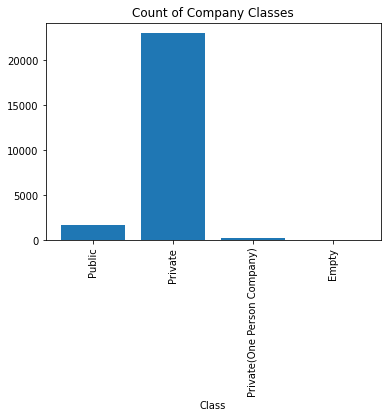

In [14]:
# Plot number of each class
plt.bar(table["Class"], table["Count"])
plt.title("Count of Company Classes")
plt.xlabel("Class")
plt.xticks(rotation = 90)
plt.show()

### COMPANY_CATEGORY
<a class="anchor" id="4.4"></a>
Category of Company: Limited by Shares, Limited by Guarantee, Unlimited Company. 

In [15]:
column = Andaman_Nicobar_Islands_2016_merged["COMPANY_CATEGORY"]
column

0        Company limited by Shares
1        Company limited by Shares
2        Company limited by Shares
3        Company limited by Shares
4        Company limited by Shares
                   ...            
24974    Company limited by Shares
24975    Company limited by Shares
24976    Company limited by Shares
24977    Company limited by Shares
24978    Company limited by Shares
Name: COMPANY_CATEGORY, Length: 24979, dtype: object

In [16]:
print("Unique values:", column.unique())

# Number of empty strings
print("Empty strings:", sum(column == " "))

# Table of number of each category
counter = dict(Counter(column))
count = { key:[value] for key, value in counter.items()}
table = pd.DataFrame.from_dict(count).rename(columns={" ": "Empty"})
table = table.melt(var_name="Category", value_name="Count")
table

Unique values: ['Company limited by Shares' 'Company Limited by Guarantee'
 'Unlimited Company' ' ']
Empty strings: 2


,Category,Count
0,Company limited by Shares,24463
1,Company Limited by Guarantee,503
2,Unlimited Company,11
3,Empty,2


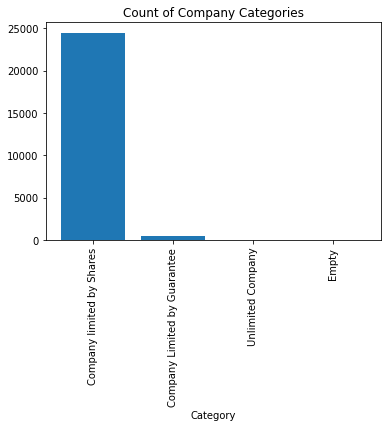

In [17]:
# Plot number of each Category
plt.bar(table["Category"], table["Count"])
plt.title("Count of Company Categories")
plt.xlabel("Category")
plt.xticks(rotation = 90)
plt.show()

### COMPANY_SUBCATEGORY
<a class="anchor" id="4.5"></a>
Subcategory of Company: Non-govt, Union Gtvt, State Govt, Subsidiary of Foreign Company, Guarantee and Association Company.

In [18]:
column = Andaman_Nicobar_Islands_2016_merged["COMPANY_SUBCAT"]
column

0          Non-govt company
1        Union Govt company
2          Non-govt company
3          Non-govt company
4          Non-govt company
                ...        
24974      Non-govt company
24975      Non-govt company
24976      Non-govt company
24977      Non-govt company
24978      Non-govt company
Name: COMPANY_SUBCAT, Length: 24979, dtype: object

In [19]:
print("Unique values:", column.unique())

# Number of empty strings
print("Empty strings:", sum(column == " "))

# Table of number of each sub-category
counter = dict(Counter(column))
count = { key:[value] for key, value in counter.items()}
table = pd.DataFrame.from_dict(count).rename(columns={" ": "Empty"})
table = table.melt(var_name="Sub-category", value_name="Count")
table

Unique values: ['Non-govt company' 'Union Govt company' 'State Govt company'
 'Subsidiary of Foreign Company' ' ' 'Guarantee and Association comp']
Empty strings: 5


,Sub-category,Count
0,Non-govt company,24863
1,Union Govt company,6
2,State Govt company,32
3,Subsidiary of Foreign Company,66
4,Empty,5
5,Guarantee and Association comp,7


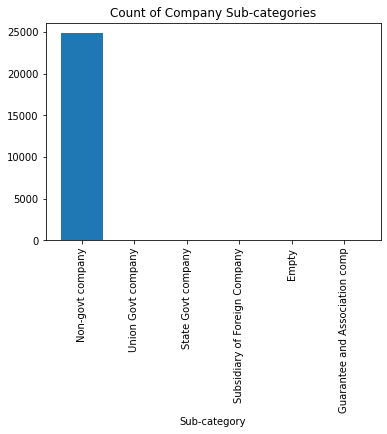

In [20]:
# Plot number of each sub-category
plt.bar(table["Sub-category"], table["Count"])
plt.title("Count of Company Sub-categories")
plt.xlabel("Sub-category")
plt.xticks(rotation = 90)
plt.show()

### COMPANY_STATUS
<a class="anchor" id="4.6"></a>
Status of Company.

In [21]:
column = Andaman_Nicobar_Islands_2016_merged["COMPANY_STATUS"]
column

0        ACTIVE
1        ACTIVE
2        ACTIVE
3        ACTIVE
4        ACTIVE
          ...  
24974    ACTIVE
24975    ACTIVE
24976    ACTIVE
24977    ACTIVE
24978    ACTIVE
Name: COMPANY_STATUS, Length: 24979, dtype: object

In [22]:
print("Unique values:", column.unique())

# Number of empty strings
print("Empty strings:", sum(column == " "))

# Table of number of each status
counter = dict(Counter(column))
count = { key:[value] for key, value in counter.items()}
table = pd.DataFrame.from_dict(count).rename(columns={" ": "Empty"})
table = table.melt(var_name="Status", value_name="Count")
table

Unique values: ['ACTIVE' 'AMALGAMATED' 'INACTIVE U/S 455 OF CA,2013' 'STRUCK-OFF'
 'CONVERTED TO LLP' 'CONVERTED TO LLP AND DISSOLVED' 'UNDER LIQUIDATION'
 'DISSOLVED' 'UNDER PROCESS OF STRUCK-OFF' 'ACTIVE-IN-PROGRESS'
 'LIQUIDATED' 'DORMANT U/S 455 OF CA,2013' 'CAPTURED'
 'INACTIVE UNDER SECTION 455 OF CA, 2013']
Empty strings: 0


,Status,Count
0,ACTIVE,16876
1,AMALGAMATED,96
2,"INACTIVE U/S 455 OF CA,2013",5364
3,STRUCK-OFF,2162
4,CONVERTED TO LLP,28
5,CONVERTED TO LLP AND DISSOLVED,12
6,UNDER LIQUIDATION,51
7,DISSOLVED,1
8,UNDER PROCESS OF STRUCK-OFF,326
9,ACTIVE-IN-PROGRESS,10


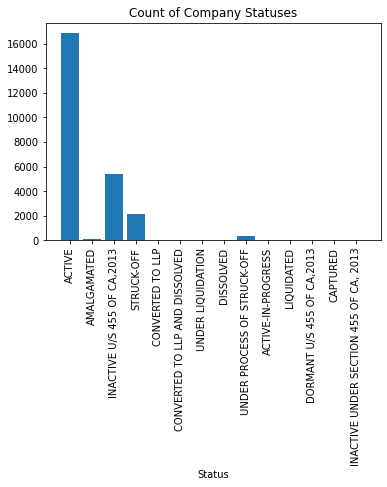

In [23]:
# Plot number of each status
plt.bar(table["Status"], table["Count"])
plt.title("Count of Company Statuses")
plt.xlabel("Status")
plt.xticks(rotation = 90)
plt.show()

### DATE_OF_REGISTRATION
<a class="anchor" id="4.7"></a>
Timestamp of date of registration:  
Inconsistant format with string and timestamp objects.

In [24]:
column = Andaman_Nicobar_Islands_2016_merged["DATE_OF_REGISTRATION"]
column

0        2007-03-23 00:00:00
1        1982-02-18 00:00:00
2        2001-02-14 00:00:00
3        2008-06-12 00:00:00
4        1993-03-16 00:00:00
                ...         
24974             2009-05-19
24975             2008-12-31
24976             2010-03-03
24977             2009-12-10
24978             2009-09-02
Name: DATE_OF_REGISTRATION, Length: 24979, dtype: object

In [25]:
# Number of null values
print("Null:", sum(column.isnull()))

# Drop null values
cleaned = column.dropna()
# Convert all objects to str in YYYY-MM-DD format
dates = cleaned.astype(str).apply(lambda x: x[:10])

# Range
print("Min:", min(dates))
print("Max:", max(dates))

Null: 53
Min: 1888-09-12
Max: 2016-11-08


In [26]:
years = dates.apply(lambda x: int(x[:4]))
# Table of number of each year
counter = dict(Counter(years))
count = { key:[value] for key, value in counter.items()}
table = pd.DataFrame.from_dict(count)
table = table.melt(var_name="Date", value_name="Count")
table

,Date,Count
0,2007,769
1,1982,127
2,2001,342
3,2008,936
4,1993,424
...,...,...
98,1906,1
99,1942,2
100,1929,1
101,1922,1


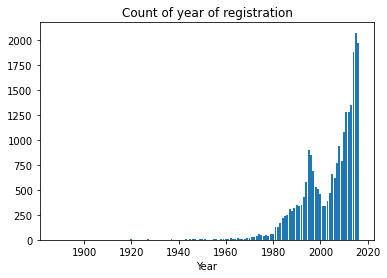

In [27]:
# Plot of number of each year
plt.bar(table["Date"], table["Count"])
plt.title("Count of year of registration")
plt.xlabel("Year")
plt.show()

### REGISTERED_STATE
<a class="anchor" id="4.8"></a>
State of registration.  

In [28]:
column = Andaman_Nicobar_Islands_2016_merged["REGISTERED_STATE"]
column

0                     Andhra Pradesh
1                     Andhra Pradesh
2                     Andhra Pradesh
3                     Andhra Pradesh
4                     Andhra Pradesh
                    ...             
24974    Andaman and Nicobar Islands
24975    Andaman and Nicobar Islands
24976    Andaman and Nicobar Islands
24977    Andaman and Nicobar Islands
24978    Andaman and Nicobar Islands
Name: REGISTERED_STATE, Length: 24979, dtype: object

In [29]:
print("Unique values:", column.unique())

# Number of empty strings
print("Empty strings:", sum(column == " "))

# Table of number of each state
counter = dict(Counter(column))
count = { key:[value] for key, value in counter.items()}
table = pd.DataFrame.from_dict(count).rename(columns={" ": "Empty"})
table = table.melt(var_name="State", value_name="Count")
table

Unique values: ['Andhra Pradesh' 'Andaman and Nicobar Islands']
Empty strings: 0


,State,Count
0,Andhra Pradesh,24661
1,Andaman and Nicobar Islands,318


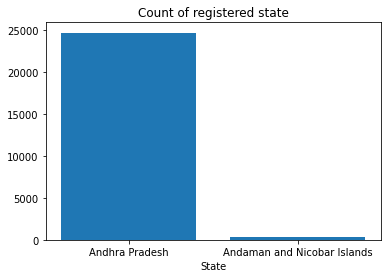

In [30]:
# Plot of number of each state
plt.bar(table["State"], table["Count"])
plt.title("Count of registered state")
plt.xlabel("State")
plt.show()

### Authorized Capital  (Rs.)
<a class="anchor" id="4.9"></a>
Authorized capital in rupees (Rs.). Note that there are two white spaces between Capital and (Rs.) in column title.

In [31]:
column = Andaman_Nicobar_Islands_2016_merged["Authorized Capital  (Rs.)"]
column

0        100000000000
1         80000000000
2         50315000000
3         50000000000
4         30000000000
             ...     
24974          100000
24975          100000
24976          500000
24977         2000000
24978        10000000
Name: Authorized Capital  (Rs.), Length: 24979, dtype: int64

In [32]:
# Number of 0 values
print("0 Capital:", sum(column == 0))

# Summary Statistics
print("Min:", min(column))
print("Max:", max(column))
print("Mean:", statistics.mean(column))
print("Mode:", statistics.mode(column))
print("Median:", statistics.median(column))

0 Capital: 84
Min: 0
Max: 100000000000
Mean: 34137413.9186917
Mode: 100000
Median: 500000


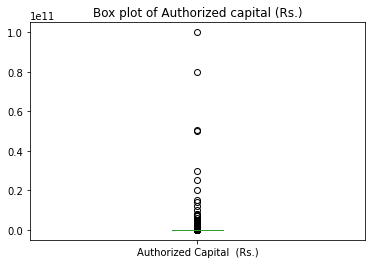

In [33]:
column.plot.box()
plt.title("Box plot of Authorized capital (Rs.)")
plt.show()

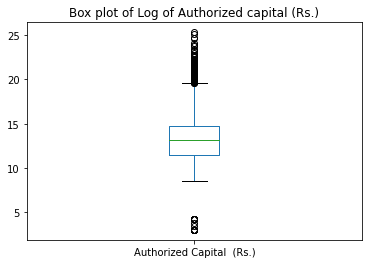

In [34]:
logged = column.apply(lambda x: np.log(x))
logged.plot.box()
plt.title("Box plot of Log of Authorized capital (Rs.)")
plt.show()

### PAIDUP_CAPITAL (Rs.)
<a class="anchor" id="4.10"></a>
Paid up capital in rupees (Rs.). Note: leading whitespace in column title.

In [35]:
column = Andaman_Nicobar_Islands_2016_merged[" PAIDUP_CAPITAL (RS.)"]
column

0        16692588120
1        48898462000
2         4579857740
3        28762779400
4        23922825890
            ...     
24974         100000
24975         100000
24976         500000
24977        1692800
24978        5165000
Name:  PAIDUP_CAPITAL (RS.), Length: 24979, dtype: int64

In [36]:
# Number of 0 values
print("0 Capital:", sum(column == 0))

# Summary Statistics
print("Min:", min(column))
print("Max:", max(column))
print("Mean:", statistics.mean(column))
print("Mode:", statistics.mode(column))
print("Median:", statistics.median(column))

0 Capital: 3858
Min: 0
Max: 48898462000
Mean: 18361634.0539253
Mode: 100000
Median: 100000


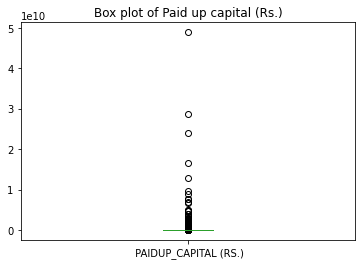

In [37]:
column.plot.box()
plt.title("Box plot of Paid up capital (Rs.)")
plt.show()

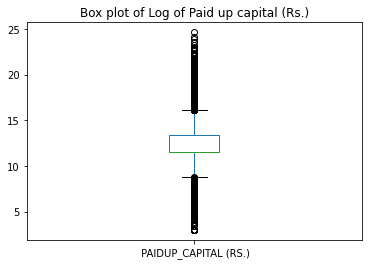

In [38]:
logged = column.apply(lambda x: np.log(x))
logged.plot.box()
plt.title("Box plot of Log of Paid up capital (Rs.)")
plt.show()

### PRINCIPAL_BUSINESS_ACTIVITY_CODE
<a class="anchor" id="4.11"></a>
Principal Business code that classifies the main type of product/service sold.

In [39]:
column = Andaman_Nicobar_Islands_2016_merged["PRINCIPAL_BUSINESS_ACTIVITY_CODE"]
column

0        74999
1        27109
2        45204
3        40102
4        27109
         ...  
24974    93000
24975    93000
24976    60231
24977    51103
24978    51103
Name: PRINCIPAL_BUSINESS_ACTIVITY_CODE, Length: 24979, dtype: int64

In [40]:
print("Min:", min(column))
print("Max:", max(column))

# Table of number of each Principal Business Activity Code
counter = dict(Counter(column))
count = { key:[value] for key, value in counter.items()}
table = pd.DataFrame.from_dict(count).rename(columns={" ": "Empty"})
table = table.melt(var_name="Principal Business Activity Code", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Min: 1
Max: 99999


,Principal Business Activity Code,Count
0,72200,1932
1,65992,1175
2,74900,994
3,74999,938
4,45200,924
...,...,...
992,55208,1
993,26959,1
994,32500,1
995,1711,1


### REGISTERED_OFFICE_ADDRESS
<a class="anchor" id="4.12"></a>
Address of registered office.  
There are 529 duplicates.

In [41]:
column = Andaman_Nicobar_Islands_2016_merged["REGISTERED_OFFICE_ADDRESS"]
column

0        APIIC INDUSTRIAL PARK, RACHAPALLI(VILLAGE)MAKA...
1        ADMINISTRATIVE BUILDINGVISAKHAPATNAMANDHRA PRA...
2        8-2-293/82/A/431/A,ROAD NO.22, JUBILEE HILLS, ...
3        6-3-1090, 5th Floor, A Block, TSR Towers,Rajbh...
4        VILLAGE JAMBULAPADU,TADIPATRI MANDAL,  ANANTHP...
                               ...                        
24974            173/1,11-1WARD NO.11  PORT BLAIR IN744101
24975    14/4 SHOP NO.3J N ROAD ,GOAL GHAR  PORT BLAIR ...
24976          WARD NO.10-1JUNGLIGHAT  PORT BLAIR IN744103
24977    NO. 33 SISTY NAGARABERDEEN VILLAGE  PORT BLAIR...
24978          232 M.G ROADLAMBA LINE  PORT BLAIR IN744101
Name: REGISTERED_OFFICE_ADDRESS, Length: 24979, dtype: object

In [42]:
# Number of empty strings
print("Empty strings:", sum(column == " "))

Empty strings: 0


In [47]:
# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))
Andaman_Nicobar_Islands_2016_merged[Andaman_Nicobar_Islands_2016_merged["REGISTERED_OFFICE_ADDRESS"] == "APSEZ, PUDIMADAKA ROADATCHUTHAPURAM MANDAL  VISAKHAPATNAM IN531011"]

No. of Duplicates: 529


,CIN,COMPANY_NAME,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUBCAT,COMPANY_STATUS,DATE_OF_REGISTRATION,REGISTERED_STATE,Authorized Capital (Rs.),PAIDUP_CAPITAL (RS.),PRINCIPAL_BUSINESS_ACTIVITY_CODE,REGISTERED_OFFICE_ADDRESS,EMAIL_ID,LATEST ANNUAL REPORT FILING FY END DATE,LATEST BALANCE SHEET FILING FY END DATE
41,U18101AP2006FTC048790,BRANDIX INDIA APPAREL CITY PRIVATELIMITED,Private,Company limited by Shares,Non-govt company,ACTIVE,2006-01-17 00:00:00,Andhra Pradesh,2226000000,2223200510,18101,"APSEZ, PUDIMADAKA ROADATCHUTHAPURAM MANDAL VI...",VinuS@brandix.com,2015-03-31,2016-03-31
15163,U74999AP2008PTC058529,SCREENLINE EMBELLISHERS (INDIA) PRIVATELIMITED,Private,Company limited by Shares,Non-govt company,ACTIVE,2008-04-03 00:00:00,Andhra Pradesh,500000,100000,74999,"APSEZ, PUDIMADAKA ROADATCHUTHAPURAM MANDAL VI...",nish@screenlineholdings.com,2015-03-31,2015-03-31


Duplicates in ```REGISTERED_OFFICE_ADDRESS``` do not mean duplicates in companies.

### EMAIL_ID
<a class="anchor" id="4.13"></a>
Company email.  
There 1692 duplicates

In [82]:
column = Andaman_Nicobar_Islands_2016_merged["EMAIL_ID"]
column

0                       csrajk@gmail.com
1                  csrinl@vizagsteel.com
2                    comp.sect@ksk.co.in
3                  cs.india@sembcorp.com
4        satyanarayan.mohanty@gerdau.com
                      ...               
24974                      ROC@VLP.CO.IN
24975           CONTACT@ANDAMANISLAND.IN
24976                      roc@vlp.co.in
24977               babu.badat@gmail.com
24978           pearlanil@rediffmail.com
Name: EMAIL_ID, Length: 24979, dtype: object

In [88]:
# Number of empty strings
print("Empty strings:", sum(column == " "))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
# Remove empty string duplicates
del duplicates[" "]
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Email ID", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Empty strings: 6922
No. of Duplicates: 1692


,Duplicate Email ID,Count
0,dsc_director@rediffmail.com,175
1,mailtocanda@gmail.com,143
2,ravadacs@yahoo.in,117
3,udanga_dsc@rediffmail.com,107
4,krishnaraoars@gmail.com,105
...,...,...
1687,jbelhyd@gmail.com,2
1688,gravikanthassociates@gmail.com,2
1689,srivalliandrao123@gmail.com,2
1690,ambica.a@rediffmail.com,2


In [90]:
Andaman_Nicobar_Islands_2016_merged[Andaman_Nicobar_Islands_2016_merged["EMAIL_ID"] == "dsc_director@rediffmail.com"]

,CIN,COMPANY_NAME,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUBCAT,COMPANY_STATUS,DATE_OF_REGISTRATION,REGISTERED_STATE,Authorized Capital (Rs.),PAIDUP_CAPITAL (RS.),PRINCIPAL_BUSINESS_ACTIVITY_CODE,REGISTERED_OFFICE_ADDRESS,EMAIL_ID,LATEST ANNUAL REPORT FILING FY END DATE,LATEST BALANCE SHEET FILING FY END DATE
698,U45200AP1998PLC030072,KAUSTUBHA INFRASTRUCTURE LIMITED,Public,Company limited by Shares,Non-govt company,ACTIVE,1998-09-03 00:00:00,Andhra Pradesh,100000000,500000,45200,MADDI LAKSHMAIAH'S BUNGALOWCHIRALA ROADCHILAKA...,dsc_director@rediffmail.com,2016-03-31,2016-03-31
829,U18100AP2005PTC046543,BHAVANAM SPINNING MILLS PRIVATE LIMITED,Private,Company limited by Shares,Non-govt company,ACTIVE,2005-06-15 00:00:00,Andhra Pradesh,80000000,75530000,18100,DNO. 1/1/773. HOUSE NO. 27/2/2VIDHYANGANGAR S....,dsc_director@rediffmail.com,2015-03-31,2015-03-31
903,U24110AP1987PTC007972,DELTA AGRO CHEMICALS PVT LTD,Private,Company limited by Shares,Non-govt company,ACTIVE,1987-11-19 00:00:00,Andhra Pradesh,70000000,12520000,24110,"D.NO. 5-87-69, A.P. COTTON ASSOCIATION BUILDIN...",dsc_director@rediffmail.com,2013-03-31,0
1077,U16009AP2009PTC065082,TRIVIKRAM TOBACCO PRIVATE LIMITED,Private,Company limited by Shares,Non-govt company,ACTIVE,2009-09-16 00:00:00,Andhra Pradesh,52000000,40000000,16009,"D. No. 1-13-13, Pragna ClassicS V N Colony GU...",dsc_director@rediffmail.com,2014-03-31,2014-03-31
1107,U01403AP2009PTC064488,JAYA HO AGRI VENTURES PRIVATE LIMITED,Private,Company limited by Shares,Non-govt company,ACTIVE,2009-07-24 00:00:00,Andhra Pradesh,50000000,35200000,1403,D NO. B-73SVN COLONY GUNTUR IN522006,dsc_director@rediffmail.com,2014-03-31,2014-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22608,U72900AP2011PTC075748,VINDY TECHNOLOGIES PRIVATE LIMITED,Private,Company limited by Shares,Non-govt company,ACTIVE,2011-08-01 00:00:00,Andhra Pradesh,100000,100000,72900,"D.NO. 5-44-8/1,1st FLOOR,4/9, BRODIPET GUNTUR...",dsc_director@rediffmail.com,0,0
22825,U74120AP2009PTC064611,SILICON SOLAR CHAPTER PRIVATE LIMITED,Private,Company limited by Shares,Non-govt company,ACTIVE,2009-08-04 00:00:00,Andhra Pradesh,100000,100000,74120,"D.NO.39-10-16, VETERINARY HOSPITAL ROADLABBIPE...",dsc_director@rediffmail.com,0,0
23603,U74920AP2004PTC042950,JAI GANESH SECURITY SERVICES PRIVATELIMITED,Private,Company limited by Shares,Non-govt company,ACTIVE,2004-03-26 00:00:00,Andhra Pradesh,100000,100000,74920,"D.NO.1-2-53/1A, J.K.C. COLLEGE ROADJ.K.C. NAGA...",dsc_director@rediffmail.com,2016-03-31,2016-03-31
23696,U74999AP2008PTC058432,YOGEE HEALTH DRINKS PRIVATE LIMITED,Private,Company limited by Shares,Non-govt company,STRUCK-OFF,2008-03-29 00:00:00,Andhra Pradesh,100000,100000,74999,"D.NO. 22-11-84/D, Shop No. 1, 2nd Floor,C.V.K....",dsc_director@rediffmail.com,2013-03-31,0


Duplicates in ```EMAIL_ID``` do not mean duplicates in companies.

### LATEST ANNUAL REPORT FILING FY END DATE
<a class="anchor" id="4.14"></a>
Latest annual report filing fiscal year end date.  
15577 invalid dates.

In [96]:
column = Andaman_Nicobar_Islands_2016_merged["LATEST ANNUAL REPORT FILING FY END DATE"]
column

0        2015-03-31
1        2015-03-31
2        2015-03-31
3        2015-03-31
4        2015-03-31
            ...    
24974    2014-03-31
24975    2015-03-31
24976    2016-03-31
24977    2015-03-31
24978    2016-03-31
Name: LATEST ANNUAL REPORT FILING FY END DATE, Length: 24979, dtype: object

In [119]:
# Number of invalid values
print("Invalid:", sum(column == "         0"))

# Count of Latest Annual report filing FY end date
counter = dict(Counter(column))
count = { key:[value] for key, value in counter.items()}
# Remove invalid date duplicates
del count["         0"]
print("Max:", max(count))
print("Min:", min(count))

table = pd.DataFrame.from_dict(count)
table = table.melt(var_name="Count of Latest Annual report filing FY end date", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table.head(10)

Invalid: 15577
Max: 2016-09-30
Min: 2004-03-31


,Count of Latest Annual report filing FY end date,Count
0,2015-03-31,4571
1,2016-03-31,1531
2,2014-03-31,1044
3,2013-03-31,931
4,2011-03-31,334
5,2010-03-31,330
6,2012-03-31,320
7,2009-03-31,160
8,2008-03-31,95
9,2013-09-30,12


### LATEST BALANCE SHEET FILING FY END DATE
<a class="anchor" id="4.15"></a>
Latest balance sheet filing fiscal year end date.  
16942 invalid dates. 

In [120]:
column = Andaman_Nicobar_Islands_2016_merged["LATEST BALANCE SHEET FILING FY END DATE"]
column

0        2015-03-31
1        2015-03-31
2        2015-03-31
3        2015-03-31
4        2015-03-31
            ...    
24974    2014-03-31
24975    2015-03-31
24976    2016-03-31
24977    2015-03-31
24978    2016-03-31
Name: LATEST BALANCE SHEET FILING FY END DATE, Length: 24979, dtype: object

In [121]:
# Number of invalid values
print("Invalid:", sum(column == "         0"))

# Count of Latest Annual report filing FY end date
counter = dict(Counter(column))
count = { key:[value] for key, value in counter.items()}
# Remove invalid date duplicates
del count["         0"]
print("Max:", max(count))
print("Min:", min(count))

table = pd.DataFrame.from_dict(count)
table = table.melt(var_name="Count of Latest Annual report filing FY end date", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table.head(10)

Invalid: 16942
Max: 2016-03-31
Min: 2005-03-31


,Count of Latest Annual report filing FY end date,Count
0,2015-03-31,4350
1,2016-03-31,1836
2,2014-03-31,958
3,2013-03-31,631
4,2012-03-31,116
5,2011-03-31,73
6,2010-03-31,38
7,2009-03-31,11
8,2008-03-31,6
9,2012-06-30,4
